#Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Data

In [83]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#One Hot Encoding on categorical Data

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#Split data into Train and Test

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

#Scaling Data using StandardScaler

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])

#Training Models

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [88]:
Poly_features = PolynomialFeatures(degree = 2)
X_train_poly = Poly_features.fit_transform(X_train)

In [89]:
LR = LinearRegression()
PR = LinearRegression()
SVR = SVR(kernel = 'rbf')
DTR = DecisionTreeRegressor(random_state = 0)
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [90]:
LR.fit(X_train, y_train)
PR.fit(X_train_poly, y_train)
SVR.fit(X_train, y_train)
DTR.fit(X_train, y_train)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

#Predicting train set itself

In [91]:
LR_Pred_train = LR.predict(X_train)
PR_Pred_train = PR.predict(X_train_poly)
SVR_Pred_train = SVR.predict(X_train)
DTR_Pred_train = DTR.predict(X_train)
RFR_Pred_train = RFR.predict(X_train)

#predicting test set

In [92]:
LR_Pred = LR.predict(X_test)
PR_Pred = PR.predict(Poly_features.transform(X_test))
SVR_Pred = SVR.predict(X_test)
DTR_Pred = DTR.predict(X_test)
RFR_Pred = RFR.predict(X_test)

#Plotting the data both on train and test

In [96]:
def plot(x,y_actual,prediction,color1,color2,title,xlabel,ylabel):
  plt.scatter(x[:,3]+x[:,4]+x[:,5],y_actual,color = color1)
  plt.plot(x[:,3]+x[:,4]+x[:,5],prediction,color = color2)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [94]:
x_train = X_train
x_train[:,3:] = sc.inverse_transform(X_train[:,3:])
x_test = X_test
x_test[:,3:] = sc.inverse_transform(X_test[:,3:])

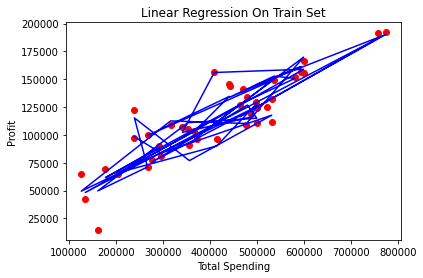

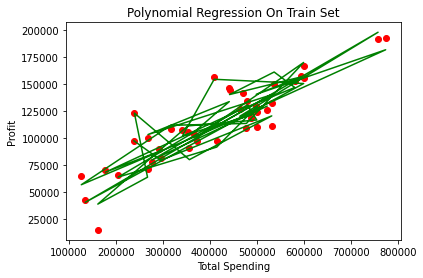

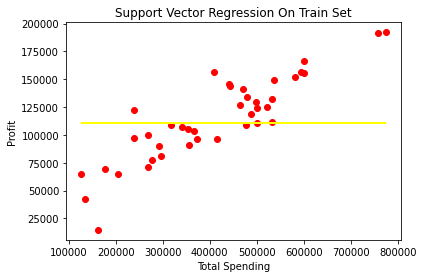

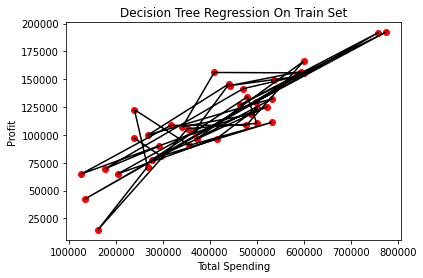

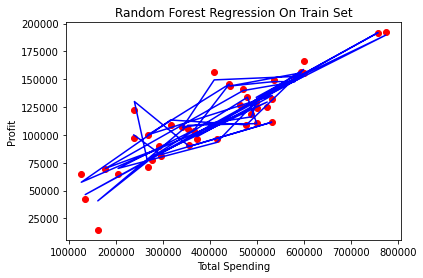

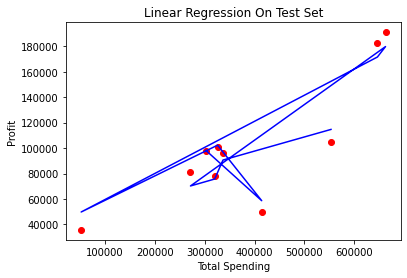

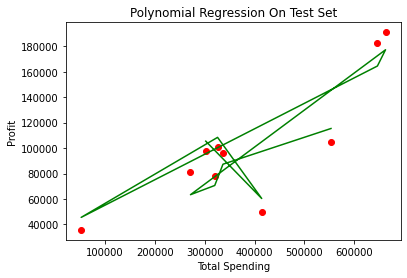

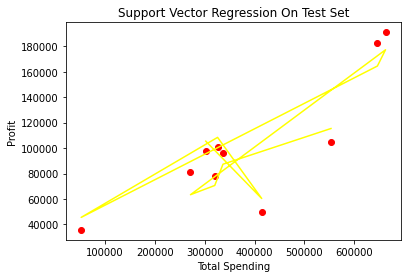

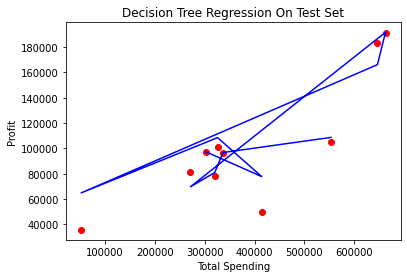

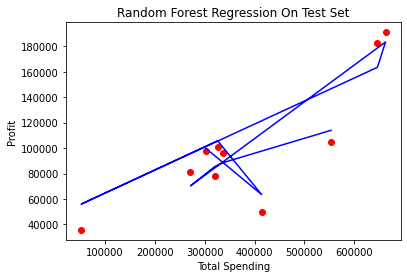

In [97]:
plot(x_train,y_train,LR_Pred_train,'red','blue','Linear Regression On Train Set','Total Spending','Profit')
plot(x_train,y_train,PR_Pred_train,'red','green','Polynomial Regression On Train Set','Total Spending','Profit')
plot(x_train,y_train,SVR_Pred_train,'red','yellow','Support Vector Regression On Train Set','Total Spending','Profit')
plot(x_train,y_train,DTR_Pred_train,'red','black','Decision Tree Regression On Train Set','Total Spending','Profit')
plot(x_train,y_train,RFR_Pred_train,'red','blue','Random Forest Regression On Train Set','Total Spending','Profit')
plot(x_test,y_test,LR_Pred,'red','blue','Linear Regression On Test Set','Total Spending','Profit')
plot(x_test,y_test,PR_Pred,'red','green','Polynomial Regression On Test Set','Total Spending','Profit')
plot(x_test,y_test,PR_Pred,'red','yellow','Support Vector Regression On Test Set','Total Spending','Profit')
plot(x_test,y_test,DTR_Pred,'red','blue','Decision Tree Regression On Test Set','Total Spending','Profit')
plot(x_test,y_test,RFR_Pred,'red','blue','Random Forest Regression On Test Set','Total Spending','Profit')